In [23]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

C:\Users\akmur\AppData\Local\Temp\ipykernel_21960\3627704266.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  return plt.stem(*args, **kwargs)


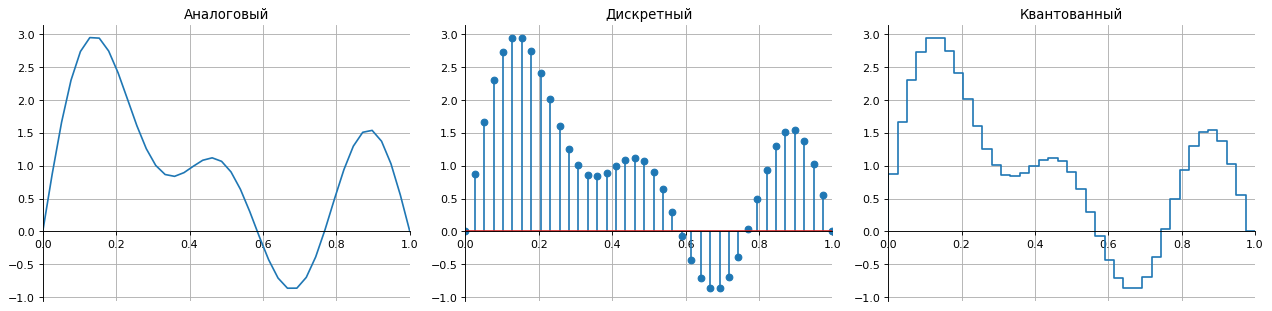

In [24]:
n = 40
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()

# Кригинг 